In [8]:
from google.colab import files
uploaded = files.upload()


Saving Walmart Sales Data.xlsx to Walmart Sales Data.xlsx


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Membaca file Excel
df = pd.read_excel('Walmart Sales Data.xlsx')

In [25]:
# Melihat 5 baris pertama dari dataset
df.head()

# Melihat informasi umum tentang dataset (tipe data, nilai yang hilang, dll.)
df.info()

# Melihat statistik deskriptif
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2013-06-10 18:36:00,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2011-01-14 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2012-08-08 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2013-09-18 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2014-06-12 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2014-12-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


In [27]:
# Menghapus baris dengan nilai yang hilang
df.dropna(inplace=True)

# Atau, mengganti nilai yang hilang pada kolom tertentu dengan nilai rata-rata (contoh untuk kolom 'Unit price')
df['Unit price'] = df['Unit price'].fillna(df['Unit price'].mean())

In [28]:
# Menghapus baris duplikat
df.drop_duplicates(inplace=True)

In [29]:
# Mengonversi kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Mengonversi kolom 'Time' menjadi format waktu
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [30]:
# Mengonversi kolom 'Quantity', 'Unit price', 'Tax 5%', dll. ke tipe data numerik
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Unit price'] = pd.to_numeric(df['Unit price'], errors='coerce')
df['Tax 5%'] = pd.to_numeric(df['Tax 5%'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['cogs'] = pd.to_numeric(df['cogs'], errors='coerce')
df['gross margin percentage'] = pd.to_numeric(df['gross margin percentage'], errors='coerce')
df['gross income'] = pd.to_numeric(df['gross income'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi Min-Max untuk kolom 'Total'
scaler = MinMaxScaler()
df[['Total']] = scaler.fit_transform(df[['Total']])

In [33]:
# Membuat Kolom Tahun, Bulan, dan Hari
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

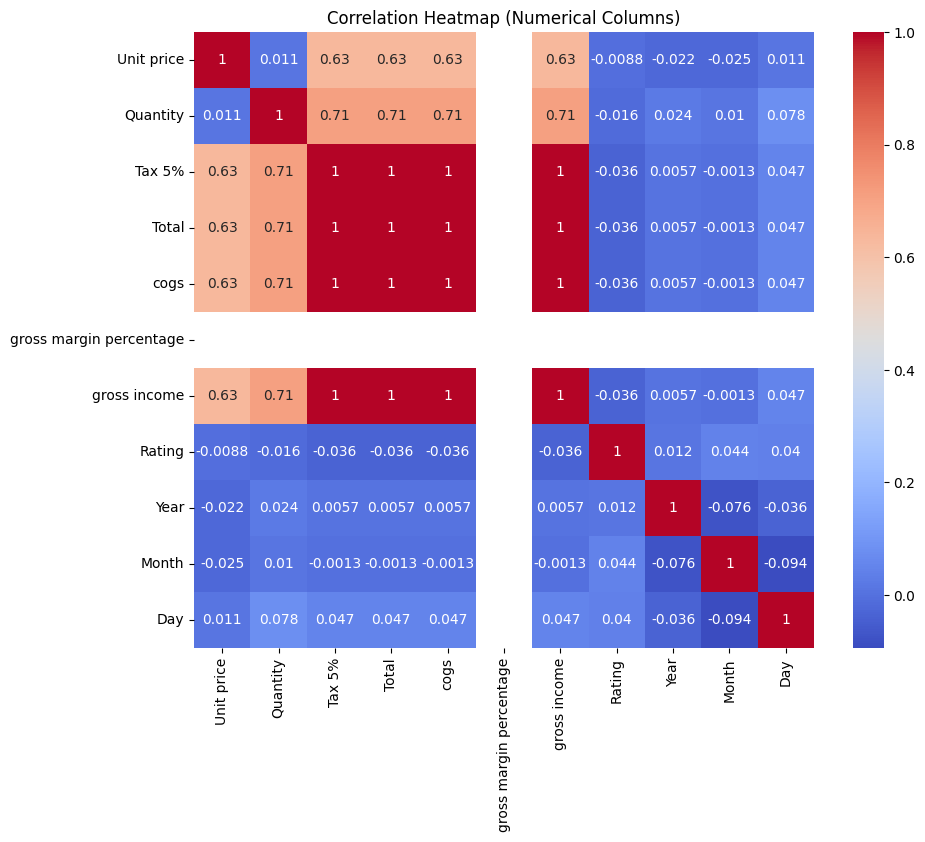

In [35]:
# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Menghapus baris yang mengandung NaN
numeric_df = numeric_df.dropna()

# Menghitung korelasi
corr = numeric_df.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

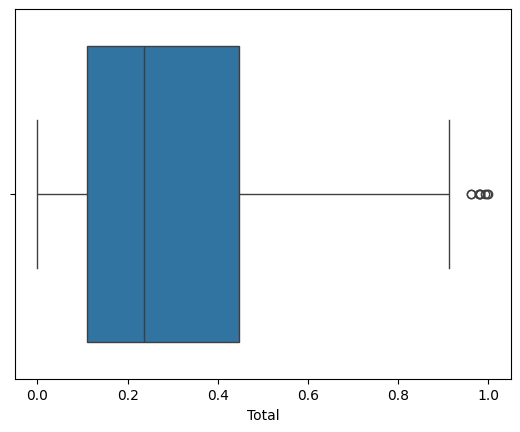

In [36]:
# Visualisasi dengan boxplot untuk mendeteksi outliers pada kolom 'Total'
sns.boxplot(x=df['Total'])

# Menghapus outliers dengan Z-Score
from scipy import stats
df = df[(np.abs(stats.zscore(df['Total'])) < 3)]  # Menghapus outlier dengan Z-Score > 3

In [41]:
# Menyimpan data yang sudah dibersihkan
df.to_csv('Walmart_Sales_Cleaned.csv', index=False)